<a href="https://colab.research.google.com/github/y-patankar/CPSC597/blob/main/SMOTE_and_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

 92% 61.0M/66.0M [00:01<00:00, 44.7MB/s]
100% 66.0M/66.0M [00:01<00:00, 41.3MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report, confusion_matrix

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the supervised autoencoder architecture
input_dim = X_train_resampled.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the supervised autoencoder
model.fit(X_train_resampled, y_train_resampled,
          epochs=10,
          batch_size=128,
          validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
3554/3554 [==============================] - 9s 2ms/step - loss: 0.0311 - val_loss: 0.0087
Epoch 2/10
3554/3554 [==============================] - 7s 2ms/step - loss: 0.0053 - val_loss: 0.0074
Epoch 3/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0037 - val_loss: 0.0150
Epoch 4/10
3554/3554 [==============================] - 7s 2ms/step - loss: 0.0030 - val_loss: 0.0102
Epoch 5/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0025 - val_loss: 0.0083
Epoch 6/10
3554/3554 [==============================] - 7s 2ms/step - loss: 0.0020 - val_loss: 0.0089
Epoch 7/10
3554/3554 [==============================] - 9s 2ms/step - loss: 0.0019 - val_loss: 0.0088
Epoch 8/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0017 - val_loss: 0.0099
Epoch 9/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0015 - val_loss: 0.0091
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
[[56838    26

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report, confusion_matrix

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the supervised autoencoder architecture
input_dim = X_train_resampled.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the supervised autoencoder
model.fit(X_train_resampled, y_train_resampled,
          epochs=10,
          batch_size=128,
          validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
3554/3554 [==============================] - 12s 3ms/step - loss: 0.0303 - val_loss: 0.0072
Epoch 2/10
3554/3554 [==============================] - 9s 3ms/step - loss: 0.0057 - val_loss: 0.0076
Epoch 3/10
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0039 - val_loss: 0.0061
Epoch 4/10
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0030 - val_loss: 0.0073
Epoch 5/10
3554/3554 [==============================] - 9s 3ms/step - loss: 0.0026 - val_loss: 0.0067
Epoch 6/10
3554/3554 [==============================] - 9s 3ms/step - loss: 0.0022 - val_loss: 0.0071
Epoch 7/10
3554/3554 [==============================] - 11s 3ms/step - loss: 0.0020 - val_loss: 0.0064
Epoch 8/10
3554/3554 [==============================] - 11s 3ms/step - loss: 0.0019 - val_loss: 0.0063
Epoch 9/10
3554/3554 [==============================] - 9s 3ms/step - loss: 0.0014 - val_loss: 0.0066
Epoch 10/10
1781/1781 [==============================] - 3s 2ms/step
[[56835 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report, confusion_matrix

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the supervised autoencoder architecture
input_dim = X_train_resampled.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the supervised autoencoder
model.fit(X_train_resampled, y_train_resampled,
          epochs=10,
          batch_size=128,
          validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
3554/3554 [==============================] - 13s 3ms/step - loss: 0.0290 - val_loss: 0.0096
Epoch 2/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0057 - val_loss: 0.0122
Epoch 3/10
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 4/10
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0031 - val_loss: 0.0091
Epoch 5/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0025 - val_loss: 0.0091
Epoch 6/10
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0020 - val_loss: 0.0093
Epoch 7/10
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0022 - val_loss: 0.0097
Epoch 8/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0018 - val_loss: 0.0101
Epoch 9/10
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0015 - val_loss: 0.0108
Epoch 10/10
1781/1781 [==============================] - 3s 2ms/step
[[56845

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, losses, callbacks

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the supervised autoencoder architecture
input_dim = X_train_resampled.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),  # Another Dropout layer
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Optimizer with a learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

# Callbacks for early stopping and learning rate adjustment
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)

# Train the supervised autoencoder
model.fit(X_train_resampled, y_train_resampled,
          epochs=30,  # Increased number of epochs
          batch_size=128,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping, reduce_lr])  # Include callbacks in training

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/30
3554/3554 [==============================] - 12s 3ms/step - loss: 0.0551 - val_loss: 0.0191 - lr: 0.0010
Epoch 2/30
3554/3554 [==============================] - 11s 3ms/step - loss: 0.0151 - val_loss: 0.0127 - lr: 0.0010
Epoch 3/30
3554/3554 [==============================] - 11s 3ms/step - loss: 0.0101 - val_loss: 0.0140 - lr: 0.0010
Epoch 4/30
3554/3554 [==============================] - 9s 3ms/step - loss: 0.0082 - val_loss: 0.0086 - lr: 0.0010
Epoch 5/30
3554/3554 [==============================] - 11s 3ms/step - loss: 0.0075 - val_loss: 0.0092 - lr: 0.0010
Epoch 6/30
3554/3554 [==============================] - 11s 3ms/step - loss: 0.0067 - val_loss: 0.0090 - lr: 0.0010
Epoch 7/30
1781/1781 [==============================] - 3s 2ms/step
[[56801    63]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.89      0.70        98

    accuracy                           1.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, losses, callbacks, initializers

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the supervised autoencoder architecture
input_dim = X_train.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dense(1, activation='sigmoid')
])

# Optimizer with a learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

# Callbacks for early stopping and learning rate adjustment
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)

# Train the supervised autoencoder
model.fit(X_train, y_train,
          epochs=30,
          batch_size=128,
          validation_data=(X_test, y_test),
          class_weight=class_weights_dict,
          callbacks=[early_stopping, reduce_lr])

# Evaluate the model using a custom threshold
y_pred_prob = model.predict(X_test)
threshold = 0.5  # This threshold can be adjusted to fine-tune precision-recall balance
y_pred = (y_pred_prob > threshold).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/30
1781/1781 [==============================] - 8s 4ms/step - loss: 0.3146 - val_loss: 0.2256 - lr: 0.0010
Epoch 2/30
1781/1781 [==============================] - 6s 4ms/step - loss: 0.2062 - val_loss: 0.1445 - lr: 0.0010
Epoch 3/30
1781/1781 [==============================] - 5s 3ms/step - loss: 0.1743 - val_loss: 0.0898 - lr: 0.0010
Epoch 4/30
1781/1781 [==============================] - 7s 4ms/step - loss: 0.1581 - val_loss: 0.0910 - lr: 0.0010
Epoch 5/30
1781/1781 [==============================] - 6s 3ms/step - loss: 0.1501 - val_loss: 0.0885 - lr: 0.0010
Epoch 6/30
1781/1781 [==============================] - 7s 4ms/step - loss: 0.1219 - val_loss: 0.0750 - lr: 0.0010
Epoch 7/30
1781/1781 [==============================] - 6s 3ms/step - loss: 0.1356 - val_loss: 0.0738 - lr: 0.0010
Epoch 8/30
1781/1781 [==============================] - 7s 4ms/step - loss: 0.1147 - val_loss: 0.0567 - lr: 0.0010
Epoch 9/30
1781/1781 [==============================] - 5s 3ms/step - loss: 0.12

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import layers, callbacks, metrics

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate less aggressive class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1] * 0.5}  # Reduce the impact on the minority class

# Define the model architecture
input_dim = X_train.shape[1]
model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),  # Reduced dropout rate
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Optimizer and compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metrics.AUC()])

# Callbacks for early stopping and learning rate adjustment
early_stopping = callbacks.EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.2, patience=2, min_lr=0.00001, mode='max')

# Train the model
model.fit(X_train, y_train,
          epochs=30,
          batch_size=128,
          validation_data=(X_test, y_test),
          class_weight=class_weights,
          callbacks=[early_stopping, reduce_lr])

# Function to find the best threshold
def find_best_threshold(model, X, y):
    from sklearn.metrics import f1_score
    pred_probs = model.predict(X)
    best_threshold = 0.5
    best_f1 = 0
    for threshold in np.arange(0.1, 0.9, 0.01):
        preds = (pred_probs > threshold).astype(int)
        f1 = f1_score(y, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold

# Evaluate the model with the best threshold
best_threshold = find_best_threshold(model, X_test, y_test)
y_pred = (model.predict(X_test) > best_threshold).astype(int)
print("Best Threshold:", best_threshold)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/30
1781/1781 [==============================] - 14s 7ms/step - loss: 0.1628 - auc: 0.9635 - val_loss: 0.0646 - val_auc: 0.9646 - lr: 0.0010
Epoch 2/30
1781/1781 [==============================] - 10s 6ms/step - loss: 0.1050 - auc: 0.9811 - val_loss: 0.0676 - val_auc: 0.9773 - lr: 0.0010
Epoch 3/30
1781/1781 [==============================] - 8s 5ms/step - loss: 0.0861 - auc: 0.9902 - val_loss: 0.0891 - val_auc: 0.9755 - lr: 0.0010
Epoch 4/30
1781/1781 [==============================] - 10s 5ms/step - loss: 0.0793 - auc: 0.9898 - val_loss: 0.0615 - val_auc: 0.9713 - lr: 0.0010
Epoch 5/30
1781/1781 [==============================] - 9s 5ms/step - loss: 0.0666 - auc: 0.9933 - val_loss: 0.0509 - val_auc: 0.9743 - lr: 2.0000e-04
Epoch 6/30
1781/1781 [==============================] - 17s 10ms/step - loss: 0.0619 - auc: 0.9952 - val_loss: 0.0462 - val_auc: 0.9752 - lr: 2.0000e-04
Epoch 7/30
1781/1781 [==============================] - 3s 2ms/step
Best Threshold: 0.8899999999999996
[[

In [ ]:
# Save the model in TensorFlow's SavedModel format
model.save('saved_model')  # Saves to a directory as a SavedModel


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import layers, callbacks, metrics, Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1] * 0.75}  # Adjusted weight for the minority class

# Define the model architecture
def build_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = Dense(16, activation='relu')(x)
    x = BatchNormalization()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_model(X_train.shape[1])

# Optimizer and compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metrics.AUC()])

# Callbacks for early stopping and learning rate adjustment
early_stopping = callbacks.EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.2, patience=2, min_lr=0.00001, mode='max')

# Train the model
model.fit(X_train, y_train,
          epochs=30,
          batch_size=128,
          validation_data=(X_test, y_test),
          class_weight=class_weights,
          callbacks=[early_stopping, reduce_lr])

# Find the best threshold
def find_best_threshold(model, X, y):
  from sklearn.metrics import f1_score
    pred_probs = model.predict(X)
    best_threshold = 0.5
    best_f1 = 0
    for threshold in np.arange(0.1, 0.9, 0.01):
        preds = (pred_probs > threshold).astype(int)
        f1 = f1_score(y, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold

# Evaluate the model with the best threshold
best_threshold = find_best_threshold(model, X_test, y_test)
y_pred = (model.predict(X_test) > best_threshold).astype(int)
print("Best Threshold:", best_threshold)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



IndentationError: unexpected indent (<ipython-input-4-0538d544ab07>, line 67)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report, confusion_matrix

# Load the credit card transaction dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the supervised autoencoder architecture
input_dim = X_train_resampled.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),  # Increased layer size
    layers.Dropout(0.2),  # Added dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Calculate class weights for balancing training
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = {0: class_weights[0], 1: class_weights[1]*2}  # Increase weight for class 1

# Train the supervised autoencoder
model.fit(X_train_resampled, y_train_resampled,
          epochs=30,  # Increased epochs
          batch_size=128,
          validation_data=(X_test, y_test),
          class_weight=class_weights)  # Apply class weights

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/30
3554/3554 [==============================] - 21s 6ms/step - loss: 0.0515 - accuracy: 0.9867 - precision: 0.9833 - recall: 0.9901 - val_loss: 0.0195 - val_accuracy: 0.9942 - val_precision: 0.2152 - val_recall: 0.8980
Epoch 2/30
3554/3554 [==============================] - 14s 4ms/step - loss: 0.0124 - accuracy: 0.9970 - precision: 0.9952 - recall: 0.9987 - val_loss: 0.0087 - val_accuracy: 0.9985 - val_precision: 0.5346 - val_recall: 0.8673
Epoch 3/30
3554/3554 [==============================] - 15s 4ms/step - loss: 0.0088 - accuracy: 0.9980 - precision: 0.9968 - recall: 0.9993 - val_loss: 0.0084 - val_accuracy: 0.9983 - val_precision: 0.5060 - val_recall: 0.8673
Epoch 4/30
3554/3554 [==============================] - 14s 4ms/step - loss: 0.0074 - accuracy: 0.9983 - precision: 0.9972 - recall: 0.9993 - val_loss: 0.0075 - val_accuracy: 0.9987 - val_precision: 0.5887 - val_recall: 0.8469
Epoch 5/30
3554/3554 [==============================] - 14s 4ms/step - loss: 0.0061 - accura

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load and prepare data
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Autoencoder architecture
input_dim = X_train_resampled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=10, batch_size=256)

# Encode the data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train_encoded, y_train_resampled)

# Evaluation
y_pred = gbc.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
1777/1777 [==============================] - 5s 2ms/step - loss: 0.7149
Epoch 2/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6811
Epoch 3/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6790
Epoch 4/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6784
Epoch 5/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6780
Epoch 6/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6778
Epoch 7/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6777
Epoch 8/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6776
Epoch 9/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6776
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
[[55664  1200]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.89      0.13 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Load and prepare data
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Autoencoder architecture
input_dim = X_train_resampled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=10, batch_size=256)

# Encode the data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train_encoded, y_train_resampled)

# Predict probabilities
y_scores = gbc.predict_proba(X_test_encoded)[:, 1]

# Compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold that gives the best precision while maintaining a high recall
threshold_optimal = thresholds[np.argmax(precisions >= 0.90)]
print("Optimal threshold:", threshold_optimal)

# Apply the optimal threshold to make final predictions
y_pred_optimal = (y_scores >= threshold_optimal).astype(int)

# Print the updated confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal))


Epoch 1/10
1777/1777 [==============================] - 5s 2ms/step - loss: 0.7175
Epoch 2/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6815
Epoch 3/10
1777/1777 [==============================] - 7s 4ms/step - loss: 0.6794
Epoch 4/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6784
Epoch 5/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6781
Epoch 6/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6779
Epoch 7/10
1777/1777 [==============================] - 4s 3ms/step - loss: 0.6777
Epoch 8/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6776
Epoch 9/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6775
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
Optimal threshold: 0.9999991544131912
[[56864     0]
 [   97     1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
      

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import classification_report, confusion_matrix

# Load and prepare data
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the autoencoder architecture
input_dim = X_train_resampled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=10, batch_size=256)

# Encode the data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Train and evaluate a classifier
classifier = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=32),
    layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train_resampled, epochs=10, batch_size=128, validation_data=(X_test_encoded, y_test))

# Evaluate the classifier
y_pred = classifier.predict(X_test_encoded) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
1777/1777 [==============================] - 5s 2ms/step - loss: 0.7182
Epoch 2/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6813
Epoch 3/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6791
Epoch 4/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6785
Epoch 5/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6782
Epoch 6/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6781
Epoch 7/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6779
Epoch 8/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6778
Epoch 9/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6777
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
Epoch 1/10
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0981 - accuracy: 0.9645 - val_loss: 0.0320 - val_accuracy: 0.9948
Epoch 2/10
3554/3554 [==================

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Load and prepare data
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the autoencoder architecture
input_dim = X_train_resampled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=10, batch_size=256)

# Encode the data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Train and evaluate a classifier
classifier = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=32),
    layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train_resampled, epochs=10, batch_size=128, validation_data=(X_test_encoded, y_test))

# Predict probabilities
probabilities = classifier.predict(X_test_encoded).flatten()

# Compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)

# Find the threshold that balances precision and recall
threshold_optimal = thresholds[np.argmax(precisions + recalls)]
print("Optimal threshold:", threshold_optimal)

# Apply the optimal threshold to make final predictions
y_pred_optimal = (probabilities >= threshold_optimal).astype(int)

# Print the updated confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal))


Epoch 1/10
1777/1777 [==============================] - 12s 6ms/step - loss: 0.7161
Epoch 2/10
1777/1777 [==============================] - 6s 3ms/step - loss: 0.6816
Epoch 3/10
 842/1777 [=============>................] - ETA: 2s - loss: 0.6816

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras import layers, Model, regularizers, initializers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Enhanced autoencoder architecture
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
encoded = layers.Dense(32, activation='relu', kernel_initializer=initializers.he_normal())(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=20, batch_size=128)

# Encode the data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Combine neural network with a random forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train_encoded, y_train_resampled)

# Predict probabilities and apply an optimized threshold
probabilities = classifier.predict_proba(X_test_encoded)[:, 1]
auc_score = roc_auc_score(y_test, probabilities)
print("AUC Score:", auc_score)

# Adjust threshold based on precision-recall trade-off
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)
threshold_optimal = thresholds[np.argmax(precisions + recalls)]
y_pred_optimal = (probabilities >= threshold_optimal).astype(int)

# Print the updated confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal))


Epoch 1/20
3554/3554 [==============================] - 9s 2ms/step - loss: 0.7024
Epoch 2/20
3554/3554 [==============================] - 7s 2ms/step - loss: 0.6796
Epoch 3/20
3554/3554 [==============================] - 8s 2ms/step - loss: 0.6787
Epoch 4/20
3554/3554 [==============================] - 7s 2ms/step - loss: 0.6783
Epoch 5/20
3554/3554 [==============================] - 8s 2ms/step - loss: 0.6781
Epoch 6/20
3554/3554 [==============================] - 7s 2ms/step - loss: 0.6780
Epoch 7/20
3554/3554 [==============================] - 8s 2ms/step - loss: 0.6780
Epoch 8/20
3554/3554 [==============================] - 7s 2ms/step - loss: 0.6779
Epoch 9/20
3554/3554 [==============================] - 7s 2ms/step - loss: 0.6778
Epoch 10/20
3554/3554 [==============================] - 8s 2ms/step - loss: 0.6778
Epoch 11/20
3554/3554 [==============================] - 7s 2ms/step - loss: 0.6777
Epoch 12/20
3554/3554 [==============================] - 8s 2ms/step - loss: 0.6777
E

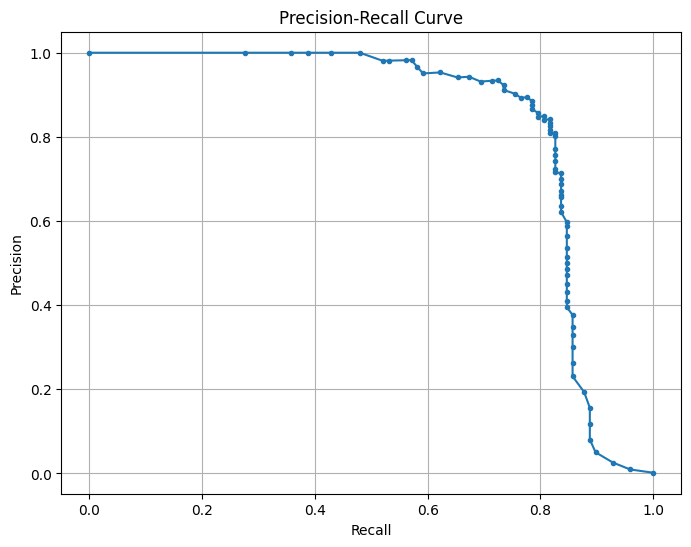

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming probabilities from the classifier and true labels y_test are defined
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()



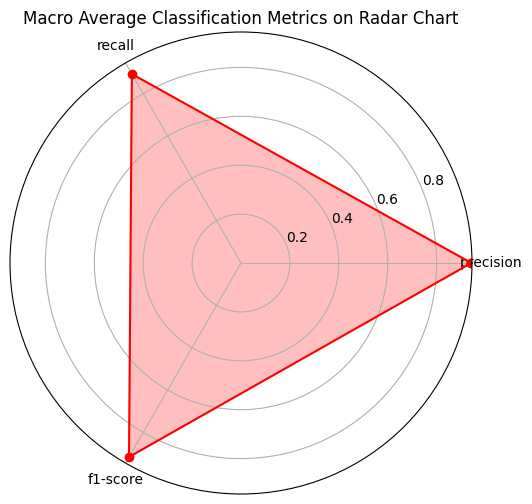

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_optimal are already defined
report = classification_report(y_test, y_pred_optimal, output_dict=True)
df = pd.DataFrame(report).transpose()

# Prepare data for radar chart
labels = df.columns[:-1]  # exclude 'support'
stats = df.loc['macro avg', labels].values
angles = np.linspace(0, 2 * pi, len(labels), endpoint=False).tolist()
stats = np.concatenate((stats,[stats[0]]))  # close the plot
angles += angles[:1]  # close the plot

# Radar chart setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red', marker='o')
ax.set_thetagrids([a * 180/pi for a in angles[:-1]], labels)
plt.title('Macro Average Classification Metrics on Radar Chart')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

# Load data
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance dataset
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Autoencoder architecture with regularization
input_dim = X_train_resampled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=10, batch_size=256)

# Encode data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Gradient Boosting with hyperparameter tuning
gbc = GradientBoostingClassifier(random_state=0)
param_grid = {'n_estimators': [50], 'learning_rate': [0.1], 'max_depth': [3]}
grid_search = GridSearchCV(gbc, param_grid, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_encoded, y_train_resampled)

# Evaluate model
y_pred = grid_search.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
1777/1777 [==============================] - 5s 2ms/step - loss: 0.7164
Epoch 2/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6818
Epoch 3/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6796
Epoch 4/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6790
Epoch 5/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6787
Epoch 6/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6785
Epoch 7/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6783
Epoch 8/10
1777/1777 [==============================] - 3s 2ms/step - loss: 0.6781
Epoch 9/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6780
Epoch 10/10
1781/1781 [==============================] - 3s 1ms/step
[[56505   359]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.87      0.31 

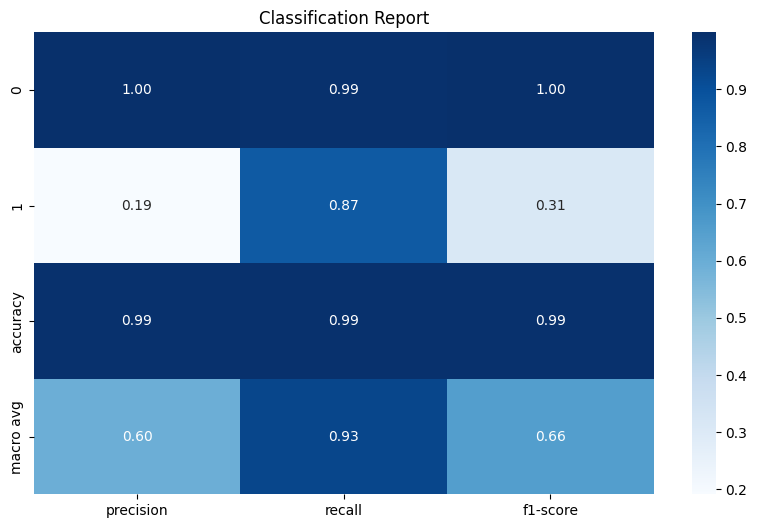

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test and y_pred are already defined
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].drop(['support'], axis=1), annot=True, cmap="Blues", fmt=".2f")
plt.title('Classification Report')
plt.show()


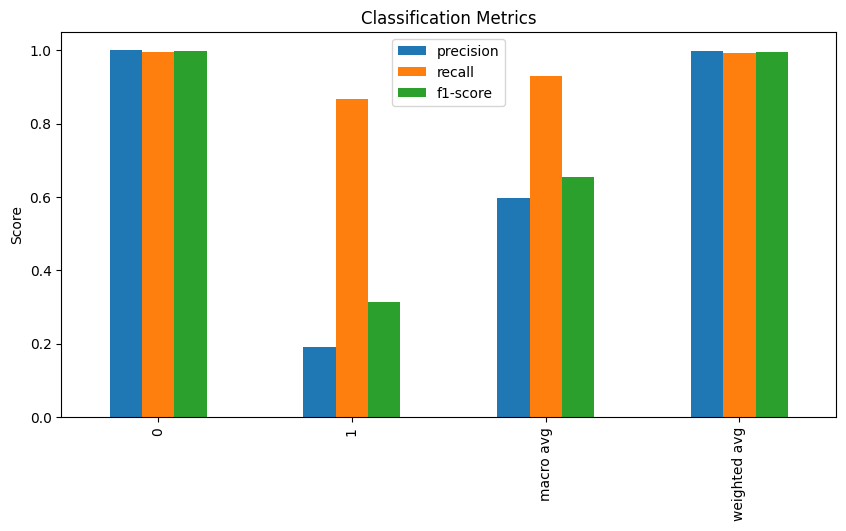

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

# Drop the last row to avoid including averages in the plot
df.drop('accuracy', inplace=True)

# Plotting
df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 5))
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.show()


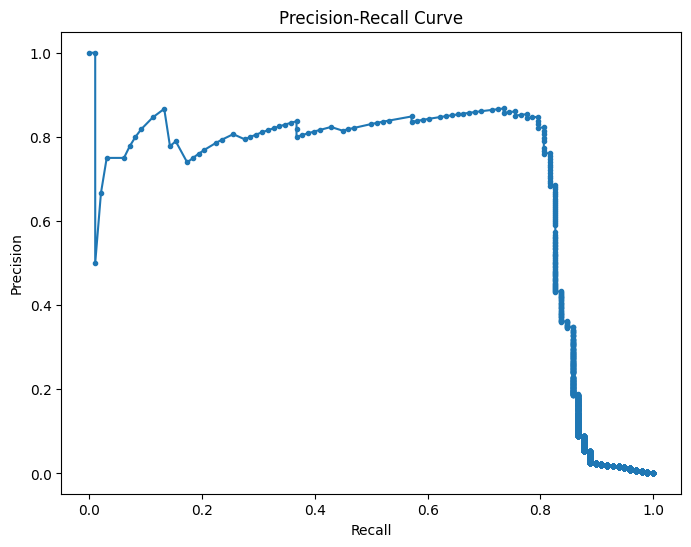

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming probabilities from a classifier
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


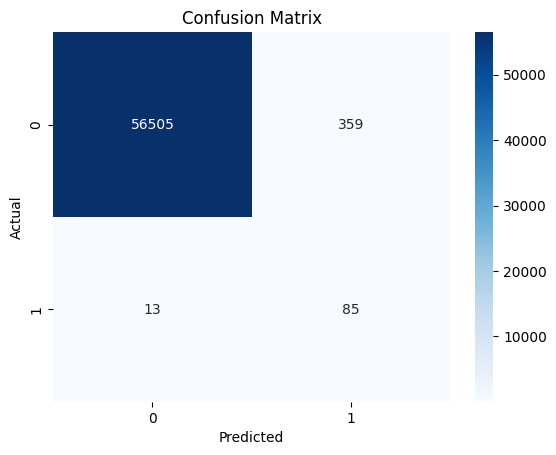

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


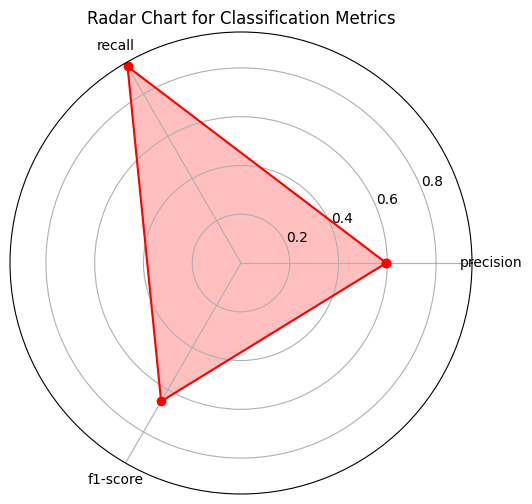

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Assuming y_test and y_pred are defined
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

# Setup the radar chart
labels=np.array(['precision', 'recall', 'f1-score'])
stats=df.loc['macro avg', labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
stats=np.concatenate((stats,[stats[0]]))
angles+=angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red', marker='o')
ax.set_thetagrids([a * 180/np.pi for a in angles[:-1]], labels)
plt.title('Radar Chart for Classification Metrics')
plt.show()


In [ ]:
from tensorflow.keras import layers, Model, regularizers, initializers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score

# Enhanced autoencoder architecture
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=30, batch_size=256)

# Encode the data
X_train_encoded = autoencoder.predict(X_train_resampled)
X_test_encoded = autoencoder.predict(X_test)

# Combine neural network with a random forest classifier
classifier = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
classifier.fit(X_train_encoded, y_train_resampled)

# Predict probabilities
probabilities = classifier.predict_proba(X_test_encoded)[:, 1]

# Find optimal threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
threshold_optimal = thresholds[np.argmax(f1_scores)]

# Apply threshold and calculate F1 score
y_pred_optimal = (probabilities >= threshold_optimal).astype(int)
f1_score_fraud = f1_score(y_test, y_pred_optimal)

print("Optimal F1 Score for Fraud Class:", f1_score_fraud)

# Print the updated confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal))


Epoch 1/30
1777/1777 [==============================] - 13s 6ms/step - loss: 0.7232
Epoch 2/30
1777/1777 [==============================] - 11s 6ms/step - loss: 0.6952
Epoch 3/30
1777/1777 [==============================] - 10s 6ms/step - loss: 0.6913
Epoch 4/30
1777/1777 [==============================] - 11s 6ms/step - loss: 0.6907
Epoch 5/30
1777/1777 [==============================] - 11s 6ms/step - loss: 0.6903
Epoch 6/30
1777/1777 [==============================] - 13s 7ms/step - loss: 0.6901
Epoch 7/30
1777/1777 [==============================] - 10s 6ms/step - loss: 0.6899
Epoch 8/30
1777/1777 [==============================] - 10s 6ms/step - loss: 0.6898
Epoch 9/30
1777/1777 [==============================] - 11s 6ms/step - loss: 0.6897
Epoch 10/30
1777/1777 [==============================] - 11s 6ms/step - loss: 0.6897
Epoch 11/30
1777/1777 [==============================] - 11s 6ms/step - loss: 0.6896
Epoch 12/30
1777/1777 [==============================] - 10s 6ms/step - lo